In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate , train_test_split , StratifiedShuffleSplit
from sklearn import   linear_model, metrics
from sklearn.linear_model import SGDClassifier as SGD

In [98]:
train_directory = "data/train.csv"

train = pd.read_csv(train_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [99]:
X = train[['age' , 'previous']][:]
y = train['y'][:]

In [100]:
classifier = RandomForestClassifier()

In [101]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                                     test_size = 0.2)

In [102]:
classifier.fit(train_data , train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
pred_labels = classifier.predict(test_data)

In [104]:
metrics.roc_auc_score(test_labels, pred_labels)

0.5302323678612337

In [105]:
#Смотрим какого типа данные
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3222 non-null   int64  
 1   job             3222 non-null   object 
 2   marital         3222 non-null   object 
 3   education       3222 non-null   object 
 4   default         3222 non-null   object 
 5   housing         3222 non-null   object 
 6   loan            3222 non-null   object 
 7   contact         3222 non-null   object 
 8   month           3222 non-null   object 
 9   day_of_week     3222 non-null   object 
 10  duration        3222 non-null   int64  
 11  campaign        3222 non-null   int64  
 12  pdays           3222 non-null   int64  
 13  previous        3222 non-null   int64  
 14  poutcome        3222 non-null   object 
 15  emp.var.rate    3222 non-null   float64
 16  cons.price.idx  3222 non-null   float64
 17  cons.conf.idx   3222 non-null   f

In [106]:
# Предсказываемый класс заметно перекошен в одну сторону
train.y.value_counts()

0    2860
1     362
Name: y, dtype: int64

In [107]:
# Для анализа baseline model посмотрим learning curves
from sklearn.model_selection import learning_curve
train_sizes = [100, 250, 500, 1000, 1500, 2061]

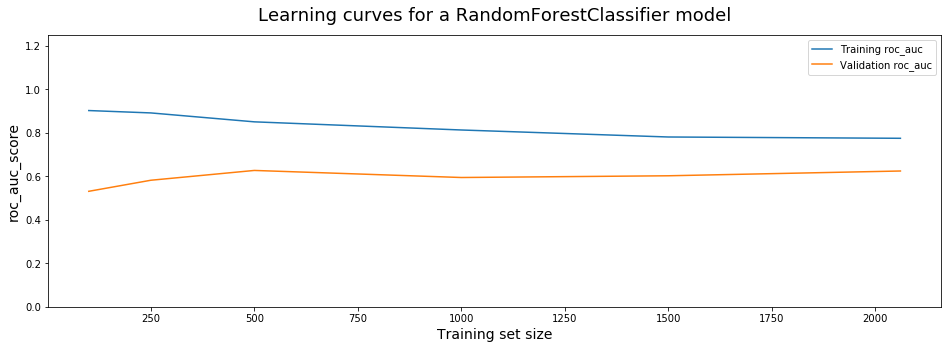

In [108]:
def learning_curves(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, X, y, train_sizes =
    train_sizes,
    cv = cv, scoring = 'roc_auc')
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training roc_auc')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation roc_auc')

    plt.ylabel('roc_auc_score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1.25)

# Строим две кривые Training и Validation
plt.figure(figsize = (16,5))
learning_curves(classifier, train_data, train_labels, train_sizes, 5)

Как видно на кривых обучения, алгоритм страдает как от overfitting, так и от underfitting. Принимается решение пересмотреть используемые параметры модели.

In [109]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.00000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,39.949100,254.391682,2.525140,961.075729,0.191186,0.09162,93.587576,-40.580261,3.618885,5166.177654,0.112353
std,10.292639,253.617387,2.546888,190.390725,0.552781,1.55203,0.578841,4.575879,1.734232,74.028498,0.315849
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.10000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [110]:
train.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,3222,3222,3222,3222,3222,3222,3222,3222,3222,3222
unique,12,4,7,2,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,796,1966,984,2581,1703,2619,2068,1103,674,2762


In [111]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [112]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
           'day_of_week', 'poutcome', 'campaign']

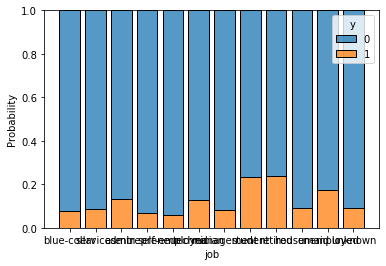

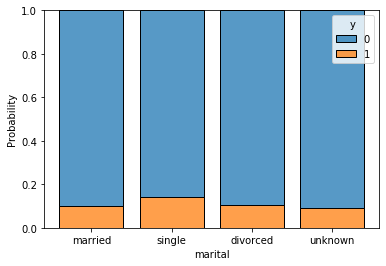

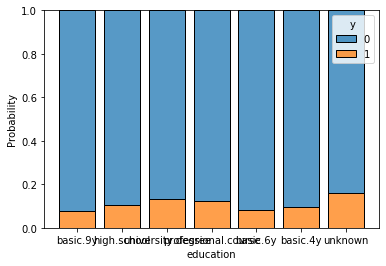

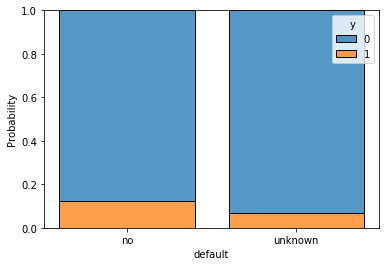

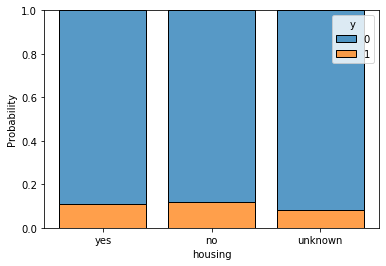

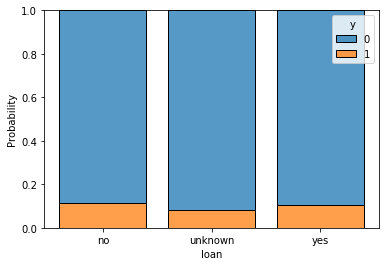

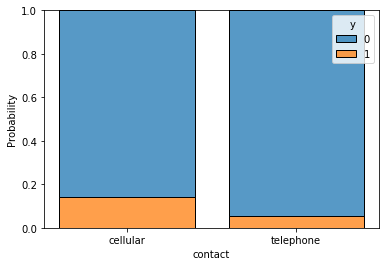

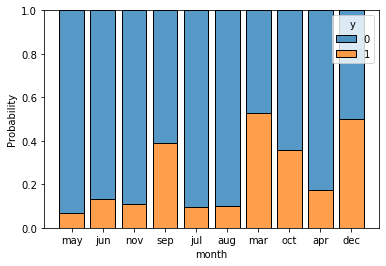

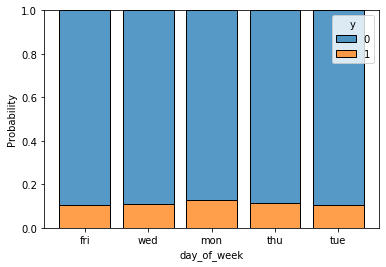

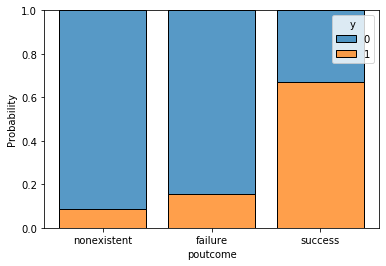

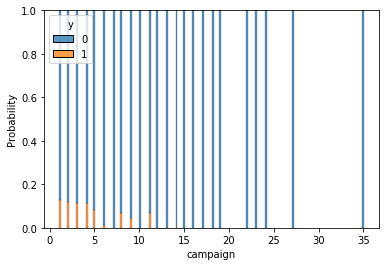

In [113]:
# Проанализируем влияние categorical переменных на предсказываемый класс y.
for i, var in enumerate(cat_vars):
    plt.figure(i)
    sns.histplot(train, x=var, hue="y", stat="probability", multiple="fill", shrink=.8)    

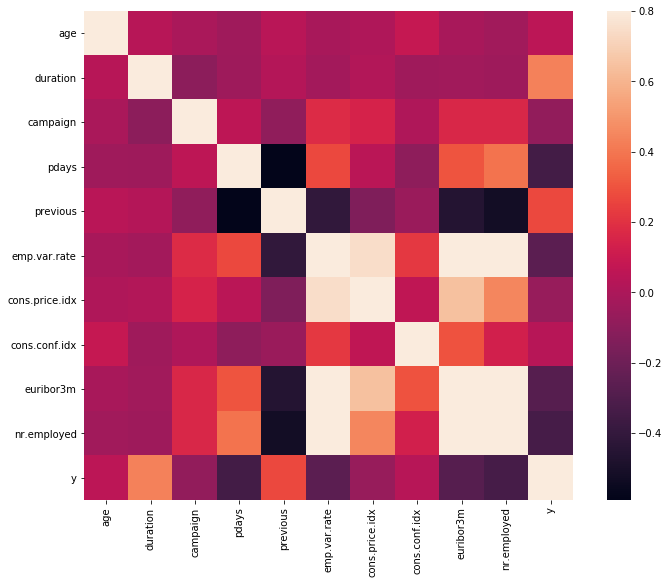

In [114]:
# Проанализируем влияние numerical переменных на переменную y
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [115]:
# Основываясь на предыдущих шагах выбираем параметры, которые заметнее коррелируют с классом y
features_to_train = ['job', 'contact', 'month', 'poutcome', 'duration',
                     'previous', 'pdays', 'nr.employed']

In [116]:
X = train[features_to_train]

In [117]:
X = pd.get_dummies(X)

In [118]:
sss = StratifiedShuffleSplit(n_splits=5)

In [119]:
classifier2 = RandomForestClassifier()

In [120]:
cv_results = cross_validate(classifier2, X, y, cv=sss, scoring='roc_auc')

In [121]:
cv_results['test_score'].mean()

0.9054684475416185

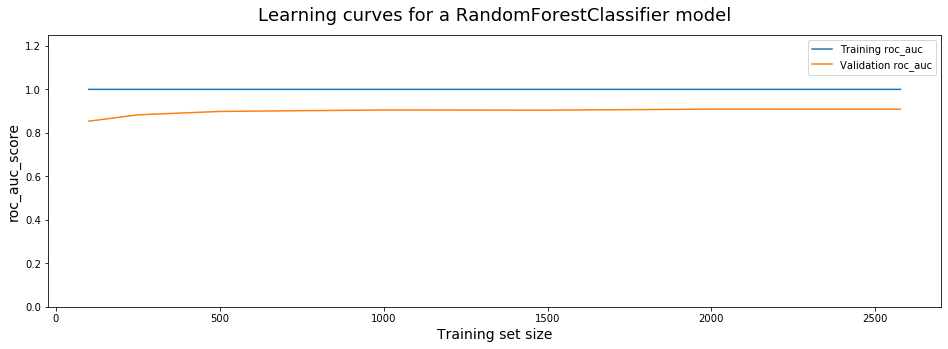

In [122]:
train_sizes = [100, 250, 500, 1000, 1500, 2000, 2577]
# Строим две кривые Training и Validation
plt.figure(figsize = (16,5))
learning_curves(classifier2, X, y, train_sizes, 5)

Как видно по кривым обучения, модель переобучилась. Необходимо добавить регулизацию. 

In [123]:
#Добавление регулязации к модели
from sklearn.model_selection import GridSearchCV
params_grid = {        
    'min_samples_split': range(2, 10, 2),
    'max_depth': range(2, 20, 2),    
}
classifier3 = GridSearchCV(RandomForestClassifier(), params_grid, cv=sss, scoring='roc_auc')

In [124]:
classifier3.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
    

In [125]:
cv_results = cross_validate(classifier3.best_estimator_, X, y, cv=sss, scoring='roc_auc')

In [126]:
classifier3.best_params_

{'max_depth': 8, 'min_samples_split': 4}

In [127]:
cv_results['test_score'].mean()

0.9329945799457995

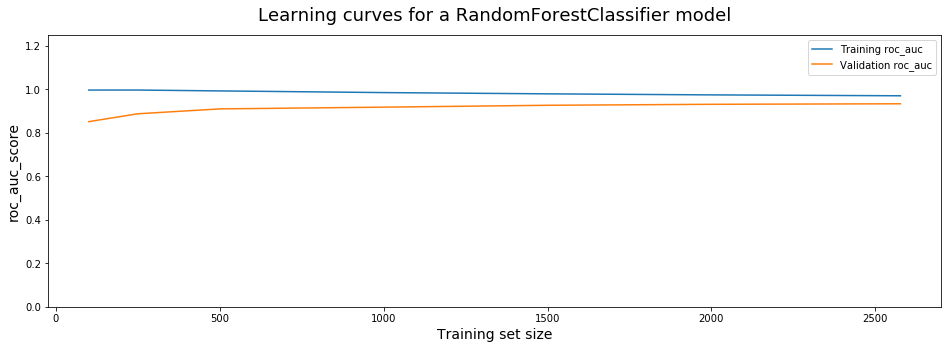

In [128]:
# Проверяем две кривые обучения Training и Validation
plt.figure(figsize = (16,5))
learning_curves(classifier3.best_estimator_, X, y, train_sizes, 5)

Для улучшения качества модели можно предпринять следующее:
- Разобраться в значении существующих переменных и подумать о создании новых переменных на их основе, для последующего добавления их в модель обучения
- Установить более сложную сетку параметров для GridSearchCV для нахождения оптимальных параметров RandomForrest
- Попробовать другие алгоритмы машинного обучения (XGBoost, SVM, ...) и сравнить результаты ROC_AUC